In [1]:
import warnings
warnings.simplefilter("ignore")

import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
#  Import and read the coffee_shops.csv
coffee_df = pd.read_csv("Resources/coffee_shops.csv")
coffee_df.drop(['id'], axis = 1, inplace = True)
coffee_df

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,category,attr_key,attr_value
0,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,restaurantspricerange2,1
1,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,bikeparking,True
2,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,outdoorseating,True
3,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,11,0,Coffee & Tea,restaurantspricerange2,2
4,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,11,0,Coffee & Tea,outdoorseating,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.002450,4.0,63,0,Coffee & Tea,bikeparking,False
30526,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.002450,4.0,63,0,Coffee & Tea,outdoorseating,False
30527,lT9ZjFt1IvKgrnAzDSc5gQ,Blunch,2973 N High St,Columbus,OH,40.022823,-83.014140,4.0,276,0,Coffee & Tea,restaurantspricerange2,2
30528,lT9ZjFt1IvKgrnAzDSc5gQ,Blunch,2973 N High St,Columbus,OH,40.022823,-83.014140,4.0,276,0,Coffee & Tea,bikeparking,True


### Features Engineering 

In [3]:
# Convert attr price range into separate column price
price_df = coffee_df[['business_id','attr_value']].loc[coffee_df['attr_key']=='restaurantspricerange2']
price_df.rename(columns = {'attr_value':'price'}, inplace = True)
price_df.drop(price_df.loc[price_df['price'] == 'None'].index, inplace = True)
cp_df = coffee_df.join(price_df.set_index('business_id'), on='business_id')
cp_df.drop_duplicates(inplace = True)
cp_df

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,category,attr_key,attr_value,price
0,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,restaurantspricerange2,1,1
1,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,bikeparking,True,1
2,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,outdoorseating,True,1
3,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,11,0,Coffee & Tea,restaurantspricerange2,2,2
4,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,11,0,Coffee & Tea,outdoorseating,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.002450,4.0,63,0,Coffee & Tea,bikeparking,False,1
30526,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.002450,4.0,63,0,Coffee & Tea,outdoorseating,False,1
30527,lT9ZjFt1IvKgrnAzDSc5gQ,Blunch,2973 N High St,Columbus,OH,40.022823,-83.014140,4.0,276,0,Coffee & Tea,restaurantspricerange2,2,2
30528,lT9ZjFt1IvKgrnAzDSc5gQ,Blunch,2973 N High St,Columbus,OH,40.022823,-83.014140,4.0,276,0,Coffee & Tea,bikeparking,True,2


In [4]:
# convert attr bikeparking into separate column price
bike_df = cp_df[['business_id','attr_value']].loc[cp_df['attr_key']=='bikeparking']
bike_df.rename(columns = {'attr_value':'bikeparking'}, inplace = True)
bike_df['bikeparking'].loc[bike_df['bikeparking'] == 'True'] = 1
bike_df['bikeparking'].loc[bike_df['bikeparking'] == 'False'] = 0
bike_df.drop(bike_df.loc[bike_df['bikeparking'] == 'None'].index, inplace = True)
cb_df = cp_df.join(bike_df.set_index('business_id'), on='business_id')
cb_df.drop_duplicates(inplace = True)
cb_df

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,category,attr_key,attr_value,price,bikeparking
0,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,restaurantspricerange2,1,1,1
1,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,bikeparking,True,1,1
2,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,outdoorseating,True,1,1
3,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,11,0,Coffee & Tea,restaurantspricerange2,2,2,NaN
4,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,11,0,Coffee & Tea,outdoorseating,True,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.002450,4.0,63,0,Coffee & Tea,bikeparking,False,1,0
30526,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.002450,4.0,63,0,Coffee & Tea,outdoorseating,False,1,0
30527,lT9ZjFt1IvKgrnAzDSc5gQ,Blunch,2973 N High St,Columbus,OH,40.022823,-83.014140,4.0,276,0,Coffee & Tea,restaurantspricerange2,2,2,1
30528,lT9ZjFt1IvKgrnAzDSc5gQ,Blunch,2973 N High St,Columbus,OH,40.022823,-83.014140,4.0,276,0,Coffee & Tea,bikeparking,True,2,1


In [5]:
# convert attr outdoorseating into separate column outdoorseating
out_df = cb_df[['business_id','attr_value']].loc[cb_df['attr_key']=='outdoorseating']
out_df.rename(columns = {'attr_value':'outdoorseating'}, inplace = True)
out_df['outdoorseating'].loc[out_df['outdoorseating'] == 'True'] = 1
out_df['outdoorseating'].loc[out_df['outdoorseating'] == 'False'] = 0
out_df.drop(out_df.loc[out_df['outdoorseating'] == 'None'].index, inplace = True)
co_df = cb_df.join(out_df.set_index('business_id'), on='business_id')
co_df.drop_duplicates(inplace = True)
co_df

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,category,attr_key,attr_value,price,bikeparking,outdoorseating
0,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,restaurantspricerange2,1,1,1,1
1,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,bikeparking,True,1,1,1
2,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.648270,5.0,23,0,Coffee & Tea,outdoorseating,True,1,1,1
3,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,11,0,Coffee & Tea,restaurantspricerange2,2,2,NaN,1
4,XrrIr0HukWA5hvM62ir65g,Tapio Tea,1145-2551 No 6 Rd,Richmond,BC,49.194168,-123.069725,4.5,11,0,Coffee & Tea,outdoorseating,True,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.002450,4.0,63,0,Coffee & Tea,bikeparking,False,1,0,0
30526,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.002450,4.0,63,0,Coffee & Tea,outdoorseating,False,1,0,0
30527,lT9ZjFt1IvKgrnAzDSc5gQ,Blunch,2973 N High St,Columbus,OH,40.022823,-83.014140,4.0,276,0,Coffee & Tea,restaurantspricerange2,2,2,1,1
30528,lT9ZjFt1IvKgrnAzDSc5gQ,Blunch,2973 N High St,Columbus,OH,40.022823,-83.014140,4.0,276,0,Coffee & Tea,bikeparking,True,2,1,1


In [6]:
# Remove attr_key and attr_value columns as they are no longer needed
# Clean data frame - drop duplicates, NA
co_df.drop(['attr_key', 'attr_value'], axis = 1, inplace = True)
co_df.drop_duplicates(inplace = True)
co_df.dropna(inplace = True)
co_df

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,category,price,bikeparking,outdoorseating
0,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.64827,5.0,23,0,Coffee & Tea,1,1,1
7,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.42231,2.5,37,1,Cafes,1,1,1
11,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.42231,2.5,37,1,Coffee & Tea,1,1,1
15,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.42231,2.5,37,1,Donuts,1,1,1
19,IuXMZPgNgjetmueLxvhYfw,Dunkin',2060 N High St,Columbus,OH,40.004190,-83.00835,4.0,16,1,Coffee & Tea,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30511,oBubxVXS_opdVvWNweeBTA,French Made Baking,81 Kingsway,Vancouver,BC,49.263325,-123.09958,4.5,148,0,Bakeries,2,1,0
30514,8RIHJUfKMg6MipNy-DUXtw,Dunkin',600 Neponset St,Canton,MA,42.165356,-71.16374,2.5,21,1,Coffee & Tea,1,0,0
30518,8RIHJUfKMg6MipNy-DUXtw,Dunkin',600 Neponset St,Canton,MA,42.165356,-71.16374,2.5,21,1,Donuts,1,0,0
30524,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.00245,4.0,63,0,Coffee & Tea,1,0,0


In [7]:
#  Import and read the generated features
add_data_df = pd.read_csv("Resources/mean_features.csv")
add_data_df

,b_id,is_chain,date_diff,month_rev,tips_count
0,--6COJIAjkQwSUZci_4PJQ,0,1862.090104,2.0400,0
1,--kyOk0waSrCDlbSvYtAOw,0,786.401887,2.1429,210
2,-0UIE35shTwWaAfQJmuL3A,1,1487.015799,1.0000,36
3,-1rvXk4zbX3I6ddMCtPlmQ,0,3416.096771,1.5606,0
4,-2outMmpJnEX_lWNjw1-OQ,1,2250.645081,1.2353,0
...,...,...,...,...,...
7458,zxbkDCJ85JHgC8CWcdMCZw,0,1231.983322,2.0370,0
7459,zy5TNyVjMHs9WGksu3-ZYA,1,5228.900451,1.4348,920
7460,zyYNLYUVabUXkwq___Q3ug,1,2717.815660,1.2273,0
7461,zy_C-wrNYaypkwZnFz7yLQ,0,1347.995139,2.0270,0


In [8]:
add_data_df.rename(columns={"date_diff": "age_in_days", "month_rev": "monthly_reviews"}, inplace = True)
add_data_df.head()

,b_id,is_chain,age_in_days,monthly_reviews,tips_count
0,--6COJIAjkQwSUZci_4PJQ,0,1862.090104,2.0400,0
1,--kyOk0waSrCDlbSvYtAOw,0,786.401887,2.1429,210
2,-0UIE35shTwWaAfQJmuL3A,1,1487.015799,1.0000,36
3,-1rvXk4zbX3I6ddMCtPlmQ,0,3416.096771,1.5606,0
4,-2outMmpJnEX_lWNjw1-OQ,1,2250.645081,1.2353,0


In [9]:
# join them
# coffee_df.set_index('business_id').join(add_data_df.set_index('b_id'))
new_df = co_df.join(add_data_df.set_index('b_id'), on='business_id')
new_df

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,category,price,bikeparking,outdoorseating,is_chain,age_in_days,monthly_reviews,tips_count
0,y2gFcAVBXmVxFXAugRe5ig,Scrumptious Crumpets,7414 SE Milwaukie Ave,Portland,OR,45.471070,-122.64827,5.0,23,0,Coffee & Tea,1,1,1,0,534.475509,2.0000,0
7,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.42231,2.5,37,1,Cafes,1,1,1,1,2450.284086,1.3448,1218
11,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.42231,2.5,37,1,Coffee & Tea,1,1,1,1,2450.284086,1.3448,1218
15,XfgeAAj9r0dRbUZYcjacgg,Dunkin',946 W State Road 436,Altamonte Springs,FL,28.664944,-81.42231,2.5,37,1,Donuts,1,1,1,1,2450.284086,1.3448,1218
19,IuXMZPgNgjetmueLxvhYfw,Dunkin',2060 N High St,Columbus,OH,40.004190,-83.00835,4.0,16,1,Coffee & Tea,1,0,1,1,1842.424491,1.2308,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30511,oBubxVXS_opdVvWNweeBTA,French Made Baking,81 Kingsway,Vancouver,BC,49.263325,-123.09958,4.5,148,0,Bakeries,2,1,0,0,3151.121030,2.5000,6076
30514,8RIHJUfKMg6MipNy-DUXtw,Dunkin',600 Neponset St,Canton,MA,42.165356,-71.16374,2.5,21,1,Coffee & Tea,1,0,0,1,4906.756690,1.0952,315
30518,8RIHJUfKMg6MipNy-DUXtw,Dunkin',600 Neponset St,Canton,MA,42.165356,-71.16374,2.5,21,1,Donuts,1,0,0,1,4906.756690,1.0952,315
30524,JnM3ClVTEKQr82GmicNGaQ,Oh My Tea,1441 Hancock St,Quincy,MA,42.249004,-71.00245,4.0,63,0,Coffee & Tea,1,0,0,0,1305.487697,2.9091,0


In [10]:
new_df.price = pd.to_numeric(new_df.price, errors='coerce')
new_df.bikeparking = pd.to_numeric(new_df.bikeparking, errors='coerce')
new_df.outdoorseating = pd.to_numeric(new_df.outdoorseating, errors='coerce')

In [11]:
new_df.dtypes

business_id         object
name                object
address             object
city                object
state               object
latitude           float64
longitude          float64
stars              float64
review_count         int64
is_open              int64
category            object
price                int64
bikeparking          int64
outdoorseating       int64
is_chain             int64
age_in_days        float64
monthly_reviews    float64
tips_count           int64
dtype: object

In [12]:
# export to csv
# new_df.to_csv("joined_data1.csv", index = False)

In [13]:
# Drop the non-beneficial ID columns
new_df.drop(['business_id', 'name', 'address', 'city', 'state'], axis = 1, inplace = True)

In [14]:
new_df

,latitude,longitude,stars,review_count,is_open,category,price,bikeparking,outdoorseating,is_chain,age_in_days,monthly_reviews,tips_count
0,45.471070,-122.64827,5.0,23,0,Coffee & Tea,1,1,1,0,534.475509,2.0000,0
7,28.664944,-81.42231,2.5,37,1,Cafes,1,1,1,1,2450.284086,1.3448,1218
11,28.664944,-81.42231,2.5,37,1,Coffee & Tea,1,1,1,1,2450.284086,1.3448,1218
15,28.664944,-81.42231,2.5,37,1,Donuts,1,1,1,1,2450.284086,1.3448,1218
19,40.004190,-83.00835,4.0,16,1,Coffee & Tea,1,0,1,1,1842.424491,1.2308,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30511,49.263325,-123.09958,4.5,148,0,Bakeries,2,1,0,0,3151.121030,2.5000,6076
30514,42.165356,-71.16374,2.5,21,1,Coffee & Tea,1,0,0,1,4906.756690,1.0952,315
30518,42.165356,-71.16374,2.5,21,1,Donuts,1,0,0,1,4906.756690,1.0952,315
30524,42.249004,-71.00245,4.0,63,0,Coffee & Tea,1,0,0,0,1305.487697,2.9091,0


In [15]:
# Convert categorical values to numeric
X_dummies = pd.get_dummies(new_df)
X_dummies

,latitude,longitude,stars,review_count,is_open,price,bikeparking,outdoorseating,is_chain,age_in_days,...,tips_count,category_Bakeries,category_Cafes,category_Chocolatiers & Shops,category_Coffee & Tea,category_Coffee & Tea Supplies,category_Coffee Roasteries,category_Donuts,category_Macarons,category_Patisserie/Cake Shop
0,45.471070,-122.64827,5.0,23,0,1,1,1,0,534.475509,...,0,0,0,0,1,0,0,0,0,0
7,28.664944,-81.42231,2.5,37,1,1,1,1,1,2450.284086,...,1218,0,1,0,0,0,0,0,0,0
11,28.664944,-81.42231,2.5,37,1,1,1,1,1,2450.284086,...,1218,0,0,0,1,0,0,0,0,0
15,28.664944,-81.42231,2.5,37,1,1,1,1,1,2450.284086,...,1218,0,0,0,0,0,0,1,0,0
19,40.004190,-83.00835,4.0,16,1,1,0,1,1,1842.424491,...,260,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30511,49.263325,-123.09958,4.5,148,0,2,1,0,0,3151.121030,...,6076,1,0,0,0,0,0,0,0,0
30514,42.165356,-71.16374,2.5,21,1,1,0,0,1,4906.756690,...,315,0,0,0,1,0,0,0,0,0
30518,42.165356,-71.16374,2.5,21,1,1,0,0,1,4906.756690,...,315,0,0,0,0,0,0,1,0,0
30524,42.249004,-71.00245,4.0,63,0,1,0,0,0,1305.487697,...,0,0,0,0,1,0,0,0,0,0


In [16]:
# Split our preprocessed data into our features and target arrays
X = X_dummies.drop(columns=["is_open"])
y = X_dummies["is_open"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Use Logistic Regression
lr1 = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {lr1.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr1.score(X_test_scaled, y_test)}')

y_predL = lr1.predict(X_test_scaled)
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_predL))

Training Score: 0.777007299270073
Testing Score: 0.7854406130268199
Confusion Matrix: 
 [[ 140  335]
 [  57 1295]]


In [20]:
# Use AdaBoosting
ada = AdaBoostClassifier().fit(X_train_scaled, y_train)
print(f'Training Score: {ada.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ada.score(X_test_scaled, y_test)}')

y_predA = ada.predict(X_test_scaled)
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_predA))

Training Score: 0.7855839416058394
Testing Score: 0.7805145046524357
Confusion Matrix: 
 [[ 144  331]
 [  70 1282]]


In [21]:
dt = DecisionTreeClassifier(random_state=1).fit(X_train_scaled, y_train)
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

y_predD = dt.predict(X_test_scaled)
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_predD))

Training Score: 1.0
Testing Score: 0.8385331143951834
Confusion Matrix: 
 [[ 322  153]
 [ 142 1210]]


In [22]:
rf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

y_predR = rf.predict(X_test_scaled)
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_predR))

Training Score: 1.0
Testing Score: 0.8522167487684729
Confusion Matrix: 
 [[ 243  232]
 [  38 1314]]


Text(0.5, -5.759144981614817, 'Predicted')

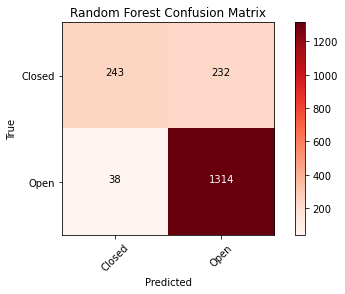

In [23]:
# print confusion matrix
import itertools

classes=['Closed', 'Open']
cm = confusion_matrix(y_test, y_predR)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Random Forest Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True')
plt.xlabel('Predicted')

Text(0.5, -5.759144981614817, 'Predicted')

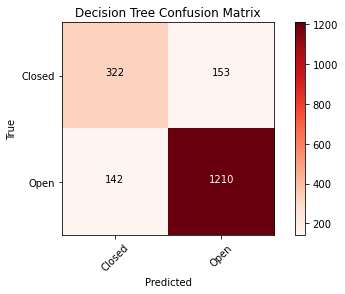

In [24]:
cm = confusion_matrix(y_test, y_predD)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Decision Tree Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True')
plt.xlabel('Predicted')

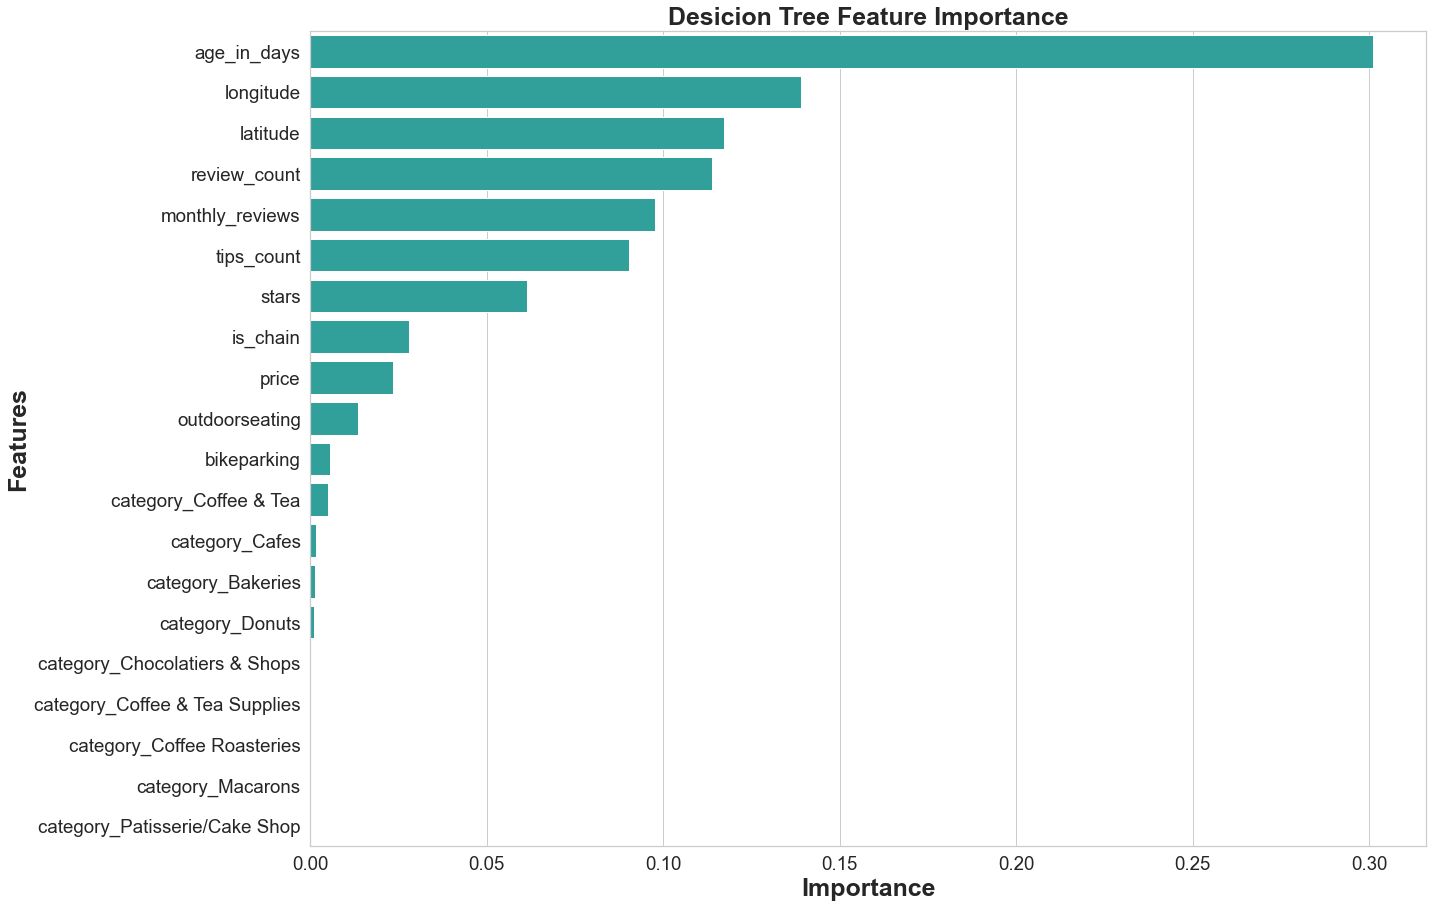

None

,Features,Gini-Importance
0,age_in_days,0.301112
1,longitude,0.138987
2,latitude,0.117117
3,review_count,0.113854
4,monthly_reviews,0.097750
5,tips_count,0.090314
6,stars,0.061403
7,is_chain,0.027956
8,price,0.023282
9,outdoorseating,0.013573


In [25]:
feats = {}
for feature, importance in zip(X.columns, dt.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='lightseagreen')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Desicion Tree Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

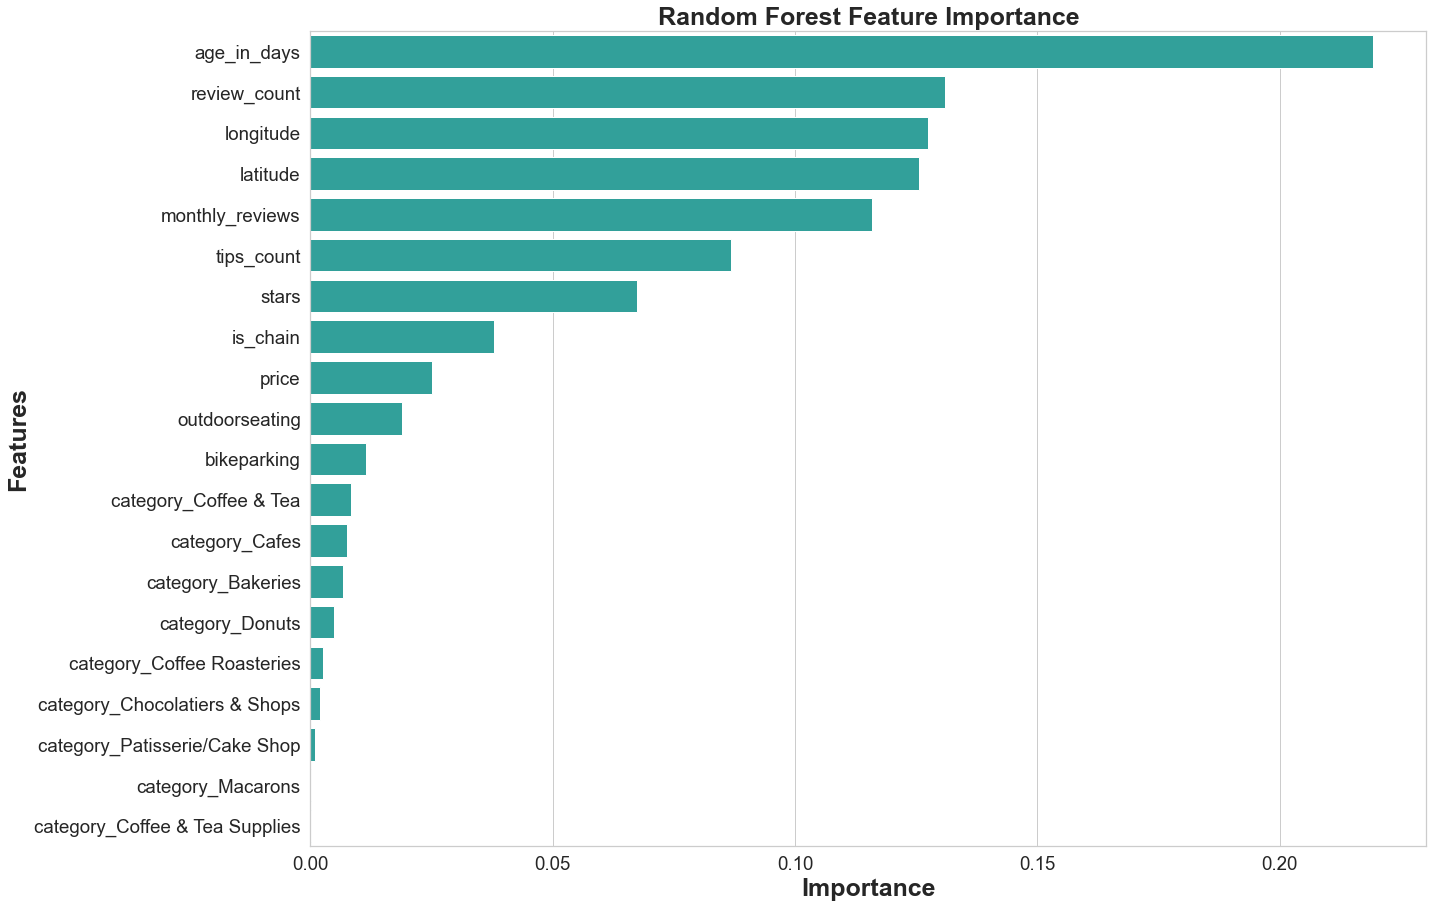

None

,Features,Gini-Importance
0,age_in_days,0.219256
1,review_count,0.130860
2,longitude,0.127454
3,latitude,0.125540
4,monthly_reviews,0.115952
5,tips_count,0.086727
6,stars,0.067410
7,is_chain,0.037916
8,price,0.025170
9,outdoorseating,0.018825


In [26]:
feats = {}
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='lightseagreen')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Random Forest Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

### Random Forest did better in predicting True Positive, and has better score
### Optimize RF with hypertunning

In [27]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

forest = RandomForestClassifier(random_state = 1)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 39.4min finished


In [28]:
bestF.score(X_test_scaled, y_test)

0.8576902025177887

In [29]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [30]:
clf_optimized = bestF.best_estimator_

Text(0.5, -31.41689206547425, 'Predicted')

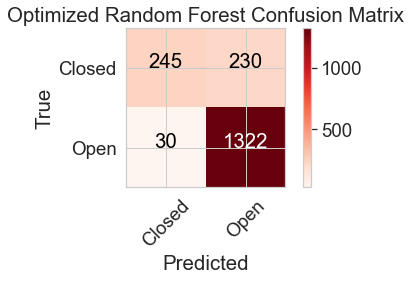

In [31]:
y_predBR = clf_optimized.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predBR)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Optimized Random Forest Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True')
plt.xlabel('Predicted')

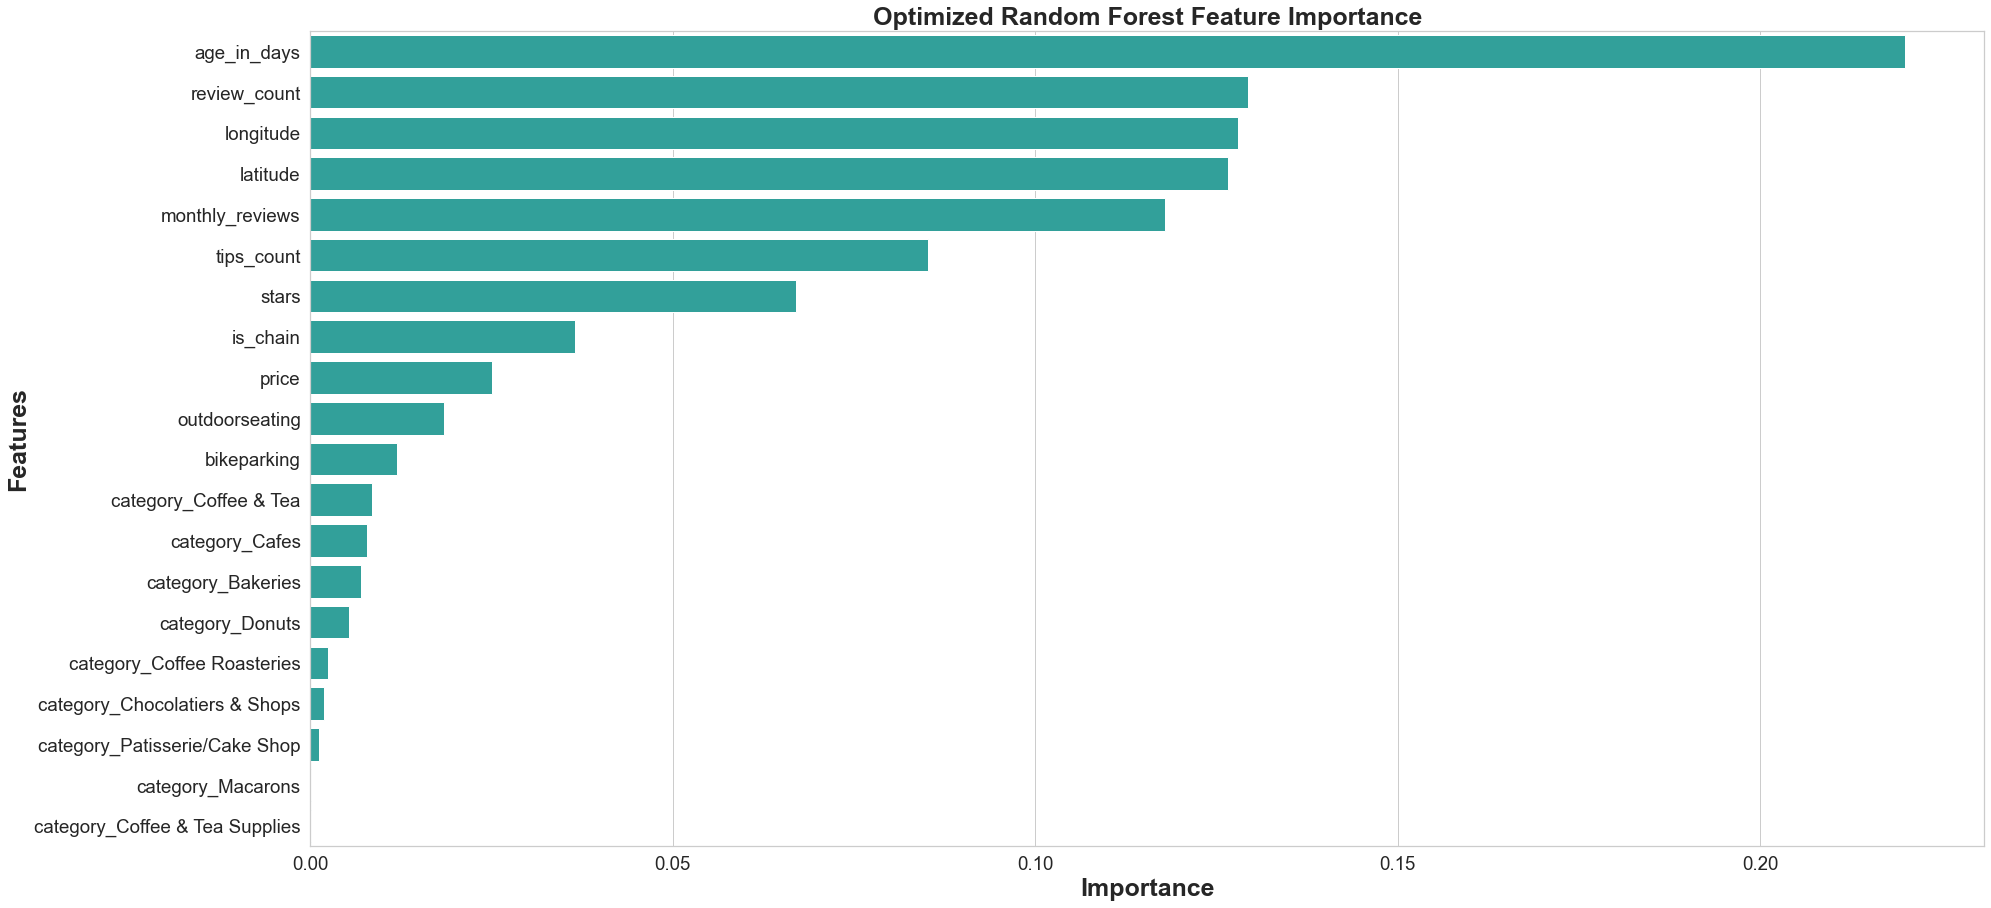

None

,Features,Gini-Importance
0,age_in_days,0.219902
1,review_count,0.129272
2,longitude,0.128018
3,latitude,0.126625
4,monthly_reviews,0.117836
5,tips_count,0.085132
6,stars,0.067034
7,is_chain,0.036494
8,price,0.025071
9,outdoorseating,0.018462


In [32]:
feats = {}
for feature, importance in zip(X.columns, clf_optimized.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='lightseagreen')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Optimized Random Forest Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [ ]:
# pip install shap

In [33]:
import shap

In [34]:
# define feature importances by using shap - it is using Shapley values from game theory
# to estimate how does each feature contribute to the prediction
explainer = shap.TreeExplainer(clf_optimized)
shap_values = explainer.shap_values(X_test_scaled)

In [ ]:
# shap.summary_plot(shap_values, X_test)
# The plot below sorts features by the sum of SHAP value magnitudes over all samples,
# and uses SHAP values to show the distribution of the impacts each feature has on the model output.
# The color represents the feature value (red high, blue low)
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

### Interesting that Random Forest and Shap show different distribution of Features

In [ ]:
# Analyze features by their importance - Age
plt.hist([new_df[new_df['is_open']==1]['age_in_days'].values,\
          new_df[new_df['is_open']==0]['age_in_days'].values],\
        label=['Open','Closed'],color=['green','red'], alpha = 0.6)


plt.legend()
plt.title('Distribution of Coffee Shops by Age')
plt.xlabel('Coffee Shops Age based on Reviews')
plt.ylabel('Counts of Coffee Shops')

plt.rcParams["figure.figsize"] = (30,15)
# plt.figure(figsize=(30,15))
plt.show

In [ ]:
# Analyze features by their importance - Coffe Shop Stars
plt.hist([new_df[new_df['is_open']==1]['stars'].values,\
          new_df[new_df['is_open']==0]['stars'].values],\
        label=['Open','Closed'],color=['green','red'], alpha = 0.6)


plt.legend()
plt.title('Distribution of Coffee Shops by Stars')
plt.xlabel('Coffee Shops Stars')
plt.ylabel('Counts of Coffee Shops')

# plt.rcParams["figure.figsize"] = (30,15)
plt.figure(figsize=(30,15))
plt.show

In [ ]:
# Analyze features by their importance - Average Number of Reviews per Month for Coffe Shops
plt.hist([new_df[new_df['is_open']==1]['monthly_reviews'].values,\
          new_df[new_df['is_open']==0]['monthly_reviews'].values],\
        label=['Open','Closed'],color=['green','red'], alpha = 0.6)


plt.legend()
plt.title('Distribution of Coffee Shops by monthly_reviews')
plt.xlabel('Coffee Shops average monthly reviews')
plt.ylabel('Counts of Coffee Shops')

# plt.rcParams["figure.figsize"] = (30,15)
plt.figure(figsize=(30,15))
plt.show

In [ ]:
# Analyze features by their importance - Is_chain
plt.hist([new_df[new_df['is_open']==1]['is_chain'].values,\
          new_df[new_df['is_open']==0]['is_chain'].values],\
        label=['Open','Closed'],color=['green','red'], alpha = 0.6)


plt.legend()
plt.title('Distribution of Coffee Shops by Chain')
plt.xlabel('Coffee Shops Is in Chain')
plt.ylabel('Counts of Coffee Shops')

plt.rcParams["figure.figsize"] = (10,7)
# plt.figure(figsize=(30,15))
plt.show